Chapter 23

# 不同坐标系
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码的主要目的是通过可视化的方式展示二维向量的操作，包括向量的绘制、线性变换以及对应的坐标系变化。代码首先定义了一个绘制向量的函数`draw_vector`，该函数接受一个向量、颜色和标签作为参数，并在二维平面上从原点绘制该向量。同时，函数将向量的坐标以文本的形式注释在图中，以便于观察。

在代码的主要部分，定义了两个向量$a = [4, 3]$和$b = [1, 3]$，以及基向量$i = [1, 0]$、$j = [0, 1]$和$k = [0, 0, 1]$。接着，通过生成一个包含 $x_1$ 和 $x_2$ 的网格，并使用线性变换矩阵$A = \begin{bmatrix} 1 & 1 \\ 2 & 4 \end{bmatrix}$，计算出变换后的坐标 $Z = X \cdot A^T$，从而得到两个新的变量$ZZ_1$和$ZZ_2$。这种线性变换通过矩阵乘法将原始坐标系中的点映射到新的坐标系。

可视化部分通过`matplotlib`绘制了两幅图：第一幅图展示了原始坐标系中的基向量和向量$b$，第二幅图则展示了经过线性变换后的新坐标系。通过设置坐标轴的范围和比例，确保向量及其变换的可视化效果清晰可见。最后，代码中还包含了坐标轴的标签和美化的设定，使得图形更加美观且易于理解。

从数学的角度来看，向量的线性组合和变换可以用以下公式表示：

1. 向量的定义：
   $$ a = \begin{pmatrix} 4 \\ 3 \end{pmatrix}, \quad b = \begin{pmatrix} 1 \\ 3 \end{pmatrix} $$

2. 线性变换：
   $$ Z = X \cdot A^T $$

3. 变换后的新坐标：
   $$ Z_1 = Z[:, 0], \quad Z_2 = Z[:, 1] $$

通过以上的操作，代码直观地展示了向量的基本运算以及其在不同坐标系下的表现，帮助理解线性代数中的重要概念。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 定义绘制向量的函数

In [2]:
def draw_vector(vector,RBG): 
    array = np.array([[0, 0, vector[0], vector[1]]], dtype=object)  # 创建一个包含向量起点和终点的数组
    X, Y, U, V = zip(*array)  # 解压数组，获取起点和终点坐标
    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color=RBG, zorder = 1000)  # 绘制向量

## 数据准备

In [3]:
# 创建 x1 和 x2 的范围
x1 = np.arange(-25, 25 + 1, step=1);
x2 = np.arange(-25, 25 + 1, step=1);

In [4]:
XX1, XX2 = np.meshgrid(x1, x2);  # 生成网格

In [5]:
X = np.column_stack((XX1.ravel(), XX2.ravel()))  # 将网格数据转化为列向量

In [6]:
# 定义线性变换的矩阵 A
A = np.matrix([[1, 1],
                [2, 4]]);

In [7]:
Z = X @ A.T;  # 对 X 应用线性变换

In [8]:
# 重新调整变换后的结果为网格形状
ZZ1 = Z[:, 0].reshape((len(x1), len(x2)))
ZZ2 = Z[:, 1].reshape((len(x1), len(x2)))

## e1 和 e2 的可视化

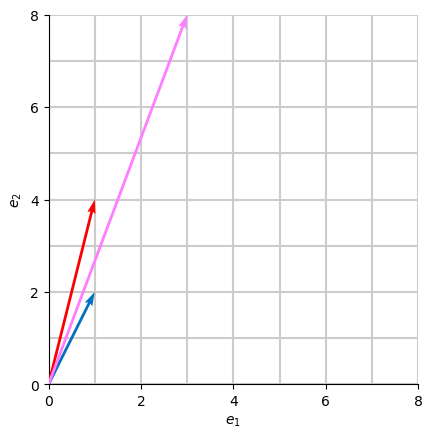

In [9]:
fig, ax = plt.subplots()

plt.plot(XX1, XX2, color=[0.8, 0.8, 0.8])  # 绘制网格线
plt.plot(XX1.T, XX2.T, color=[0.8, 0.8, 0.8])  # 绘制网格线

a1 = A[:, 0].tolist()  # 提取 A 的第一列
a2 = A[:, 1].tolist()  # 提取 A 的第二列
b = [3, 8]  # 定义一个向量 b

draw_vector(a1, np.array([0, 112, 192]) / 255)  # 绘制第一个基向量
draw_vector(a2, np.array([255, 0, 0]) / 255)  # 绘制第二个基向量

draw_vector(b, np.array([255, 125, 255]) / 255)  # 绘制向量 b

plt.xlabel('$e_1$')  # 设置 x 轴标签
plt.ylabel('$e_2$')  # 设置 y 轴标签

plt.axis('scaled')  # 设置坐标轴比例
ax.set_xlim([0, 8])  # 设置 x 轴范围
ax.set_ylim([0, 8])  # 设置 y 轴范围

plt.xticks(np.arange(0, 8 + 1, step=2))  # 设置 x 轴刻度
plt.yticks(np.arange(0, 8 + 1, step=2))  # 设置 y 轴刻度

ax.spines['top'].set_visible(False)  # 隐藏顶部边框
ax.spines['right'].set_visible(False)  # 隐藏右边框

## a1 和 a2 的可视化

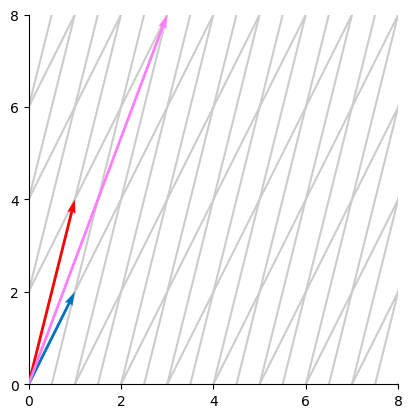

In [10]:
fig, ax = plt.subplots()

plt.plot(ZZ1, ZZ2, color=[0.8, 0.8, 0.8])  # 绘制变换后的网格线
plt.plot(ZZ1.T, ZZ2.T, color=[0.8, 0.8, 0.8])  # 绘制变换后的网格线

draw_vector(a1, np.array([0, 112, 192]) / 255)  # 绘制第一个基向量
draw_vector(a2, np.array([255, 0, 0]) / 255)  # 绘制第二个基向量

draw_vector(b, np.array([255, 125, 255]) / 255)  # 绘制向量 b

plt.axis('scaled')  # 设置坐标轴比例
ax.set_xlim([0, 8])  # 设置 x 轴范围
ax.set_ylim([0, 8])  # 设置 y 轴范围

plt.xticks(np.arange(0, 8 + 1, step=2))  # 设置 x 轴刻度
plt.yticks(np.arange(0, 8 + 1, step=2))  # 设置 y 轴刻度

ax.spines['top'].set_visible(False)  # 隐藏顶部边框
ax.spines['right'].set_visible(False)  # 隐藏右边框